In [23]:
%run Functions.ipynb

# PCA with EEG Data
* Can reducing dimensions of data classifcation score?

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
matplotlib.rcParams.update({'font.size': 15})

import mne
from mne.datasets import sample
from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
#for scaling data into n_sample * n_feature array
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#classifer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import mne
from mne.decoding import (SlidingEstimator, GeneralizingEstimator,
                         cross_val_multiscore, LinearModel, get_coef, Vectorizer,CSP)


import os
import os.path as op
from os import listdir
from os.path import isfile, join

from sklearn.decomposition import PCA, FastICA

In [1]:
# path = 'E:\eeg_data'
path = 'C:\Users\Esimk\OneDrive\Desktop\eeg_data'
# reading all data at once will take up lots of memory. don't do it...
# all_files = read_epoch_files(path)

In [4]:
subject_runs = []
for file in os.listdir(path):
    if file.endswith(".fif"):
        subject_runs.append(os.path.join(path, file))

In [15]:
filtered_epoch_files = []
n_epochs = 200
for f in subject_runs:
    epochs = mne.read_epochs(f, preload=True)
    if len(epochs.events[:,-1]) >=200:
        filtered_epoch_files.append(f)

Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj10_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
294 matching events found
Created an SSP operator (subspace dimension = 1)
294 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj10_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
286 matching events found
Created an SSP operator (subspace dimension = 1)
286 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\ee

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
285 matching events found
Created an SSP operator (subspace dimension = 1)
285 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj14_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
275 matching events found
Created an SSP operator (subspace dimension = 1)
275 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj15_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 pr

        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
287 matching events found
Created an SSP operator (subspace dimension = 1)
287 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj19_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
183 matching events found
Created an SSP operator (subspace dimension = 1)
183 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj19_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) act

        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
285 matching events found
Created an SSP operator (subspace dimension = 1)
285 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj22_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
278 matching events found
Created an SSP operator (subspace dimension = 1)
278 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj22_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
 

11 matching events found
Created an SSP operator (subspace dimension = 1)
11 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj26_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
2 matching events found
Created an SSP operator (subspace dimension = 1)
2 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj27_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
302 matching events found
Created an SSP operato

202 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj4_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
280 matching events found
Created an SSP operator (subspace dimension = 1)
280 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj4_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
275 matching events found
Created an SSP operator (subspace dimension = 1)
275 matching events found
Created an SSP ope

1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj8_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
293 matching events found
Created an SSP operator (subspace dimension = 1)
293 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj8_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
285 matching events found
Created an SSP operator (subspace dimension = 1)
285 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\User

In [17]:
len(filtered_epoch_files
epochs = mne.read_epochs(, preload=True)

83

In [ ]:
# all_filtered_files = filter_numb_epochs(all_files, n_epochs=200)

In [21]:
#get a random epoch file greater than 200 epochs
np.random.seed(42)
epoch_f = filtered_epoch_files[np.random.choice(len(filtered_epoch_files))]
print("epoch file name", epoch_f)
epochs = mne.read_epochs(epoch_f, preload=True)

('epoch file name', 'C:\\Users\\Esimk\\OneDrive\\Desktop\\eeg_data\\Ex10_Suj24_Run4-epo.fif')
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj24_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
263 matching events found
Created an SSP operator (subspace dimension = 1)
263 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [ ]:
# #get a random epoch file
# np.random.seed(42)
# epochs = all_filtered_files[np.random.choice(len(all_filtered_files))]

## Use PCA on the epoch file 
* How do we choose the optimal number of components?
    1. Compute Average squared projection error (can't find any info on projection error)
    2. Total variation in data 
    3. divide total variation in data by average squared projection error.
        * If value is less than a threshold (usually 0.01) then it is a good fit.
    4. This process is referred to as % of variance retained. 

In [36]:
hype_kwargs = dict(penalty = 'l2')
clf = pipeline(classifier='LogisticRegression', hype_kwargs=hype_kwargs)

<class 'sklearn.linear_model.logistic.LogisticRegression'>


In [37]:
epochs = filter_events(epochs, [4,5])
X = epochs.get_data()
y = epochs.events[:,-1]
pca = UnsupervisedSpatialFilter(PCA(),  average=False)

pca.fit_transform(X);

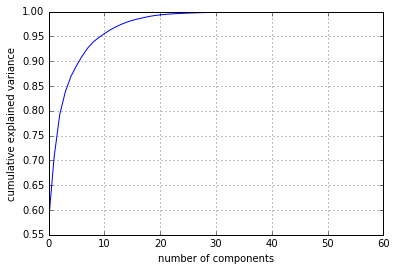

In [46]:
# plot the cumulative explained variance ratio
evr = np.cumsum(pca.estimator.explained_variance_ratio_)
plt.plot(evr)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()

In [50]:
# extract minimum number of components where % variance retained is 99%
n_components = np.argwhere(evr > .99)[0]
print(n_components)

[18]


## Perform classification with computed n_components for PCA


In [ ]:
epochs = filter_events(epochs, [4,5])
X = epochs.get_data()
y = epochs.events[:,-1]
pca  =  UnsupervisedSpatialFilter(PCA(5),  average=False)

pca_data = pca.fit_transform(X)

# score, clf, X_test, y_test = classify_test(pca_data,y)
print("score", score)
pred = clf.predict(X_test) 

In [ ]:
# print(pred)
# print(y_test)
mse = mean_squared_error(y_test, pred)
var = np.var(X)

In [ ]:
print("mse", mse)
print("var", var)
/var

In [ ]:
#regular score
score = classify_test(X,y)
print("Score: ", score)

In [ ]:
pca_score = classify_test(pca_data,y)
print("PCA Score: ", pca_score)

In [ ]:
ev = mne.EvokedArray(np.mean(pca_data, axis=0),
                     mne.create_info(5, epochs.info['sfreq'],
                                     ch_types='eeg'))

# ev.plot(show=False, window_title="PCA");

In [ ]:

pca_data.shape

In [ ]:
epochs.get_data().shape

In [ ]:
# epochs.plot(n_channels = 61);

In [ ]:
epochs = filter_events(epochs, [4,5])

In [ ]:
len(epochs[epochs.events[:,-1] == 5])/float(len(epochs.events[:,-1]))
# 47 percent is ok